In [243]:
import numpy as np
import pandas as pd
import random
from bs4 import BeautifulSoup

from IPython.display import Image
from IPython.core.display import HTML

import geocoder
from geopy.geocoders import Nominatim

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

import requests

from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

print('Libraries imported')

Libraries imported


In [244]:
edm_crime_df = pd.read_csv('https://raw.githubusercontent.com/stas2205/Coursera_Capstone./master/EPS_Neighbourhood_Criminal_Incidents.csv')
edm_crime_df.dropna(
    axis = 0,
    how = 'all',
    thresh = None,
    inplace = True
    
)
edm_crime_df.head()

,Neighbourhood Description (Occurrence),UCR Violation Type Group (Incident),Incident Reported Year,Incident Reported Quarter,Incident Reported Month,# Incidents
0,ABBOTTSFIELD,Assault,2018,Q1,1,3
1,ABBOTTSFIELD,Assault,2018,Q1,2,5
2,ABBOTTSFIELD,Assault,2018,Q1,3,2
3,ABBOTTSFIELD,Assault,2018,Q2,4,2
4,ABBOTTSFIELD,Assault,2018,Q2,5,6


In [245]:
edm_crime_df.columns = ['Neighbourhood', 'Violation type', 'Year', 'Quater', 'Month', '# Incidents']
edm_crime_df.head()

,Neighbourhood,Violation type,Year,Quater,Month,# Incidents
0,ABBOTTSFIELD,Assault,2018,Q1,1,3
1,ABBOTTSFIELD,Assault,2018,Q1,2,5
2,ABBOTTSFIELD,Assault,2018,Q1,3,2
3,ABBOTTSFIELD,Assault,2018,Q2,4,2
4,ABBOTTSFIELD,Assault,2018,Q2,5,6


In [246]:
edm_crime_df['Neighbourhood'].value_counts()

DOWNTOWN                      81
CENTRAL MCDOUGALL             75
SUMMERLEA                     74
BOYLE STREET                  73
ALBERTA AVENUE                72
                              ..
RIVER VALLEY FORT EDMONTON     1
RIVER VALLEY OLESKIW           1
CLAREVIEW CAMPUS               1
RIVER VALLEY TERWILLEGAR       1
RIVER VALLEY WHITEMUD          1
Name: Neighbourhood, Length: 337, dtype: int64

In [247]:
column_names = ['Neighbourhood', 'Borough']

edm_neigh_bor = pd.DataFrame(columns=column_names)

edm_neigh_bor['Neighbourhood'] = edm_crime_df['Neighbourhood'].unique()

neigh_bor_dict = {'DOWNTOWN':'Central Core', 'BOYLE STREET':'Central Core', 'CENTRAL MCDOUGALL':'Central Core', 'MCCAULEY':'Central Core', 'OLIVER':'Central Core', 'QUEEN MARY PARK':'Central Core', 'RIVERDALE':'Central Core', 'ROSSDALE':'Central Core', 'CLOVERDALE':'Central Core', 'GARNEAU':'Central Core', 'STRATHCONA':'Central Core', 'UNIVERSITY OF ALBERTA':'Central Core', 'BARANOW':'North Sector', 'BATURYN':'North Sector', 'BEAUMARIS':'North Sector', 'CAERNARVON':'North Sector', 'CANOSSA':'North Sector', 'CARLISLE':'North Sector', 'CHAMBERY':'North Sector', 'DUNLUCE':'North Sector', 'ELSINORE':'North Sector', 'LORELEI':'North Sector', 'RAPPERSWILL':'North Sector', 'BELLE RIVE':'North Sector', 'EAUX CLAIRES':'North Sector', 'KLARVATTEN':'North Sector', 'LAGO LINDO':'North Sector', 'MAYLIEWAN':'North Sector', 'OZERNA':'North Sector', 'SCHONSEE':'North Sector', 'CARLTON':'North Sector', 'CUMBERLAND':'North Sector', 'HUDSON':'North Sector', 'OXFORD':'North Sector', 'PEMBINA':'North Sector', 'GRIESBACH':'North Sector',
                 'CASSELMAN':'Northeast Sector', 'EBBERS':'Northeast Sector', 'MCLEOD':'Northeast Sector', 'MILLER':'Northeast Sector', 'BANNERMAN':'Northeast Sector', 'BELMONT':'Northeast Sector', 'CLAREVIEW TOWN CENTER':'Northeast Sector', 'FRASER':'Northeast Sector', 'HAIRSINE':'Northeast Sector', 'KERNOHAN':'Northeast Sector', 'KIRKNESS':'Northeast Sector', 'SIFTON PARK':'Northeast Sector', 'CANON RIDGE':'Northeast Sector', 'HOMESTEADER':'Northeast Sector', 'OVERLANDERS':'Northeast Sector', 'EVERGREEN':'Northeast Sector', 'BRINTNELL':'Northeast Sector', 'GORMAN':'Northeast Sector', 'HOLLICK-KENYON':'Northeast Sector', 'MATT BERRY':'Northeast Sector', 'MCCONACHIE AREA':'Northeast Sector', 'DECOTEAU':'Southeast Sector', 'ELLERSLIE':'Southeast Sector', 'ELLERSLIE INDUSTRIAL':'Southeast Sector', 'THE ORCHARDS AT ELLERSLIE':'Southeast Sector', 'SUMMERSIDE':'Southeast Sector', 'LARKSPUR':'Southeast Sector', 'LAUREL':'Southeast Sector', 'MAPPLE RIDGE':'Southeast Sector', 'MAPPLE RIDGE INDUSTRIAL':'Southeast Sector',
                 'SILVER BERRY':'Southeast Sector', 'TAMARACK':'Southeast Sector', 'WILD ROSE':'Southeast Sector', 'JACKSON HEIGHTS':'Southeast Sector', 'KINISKI GARDENS':'Southeast Sector', 'EKOTA':'Southeast Sector', 'MENISA':'Southeast Sector', 'SATOO':'Southeast Sector', 'KAMEYOSEK':'Southeast Sector', 'MEYONOHK':'Southeast Sector', 'TIPASKAN':'Southeast Sector', 'MILL WOODS PARK':'Southeast Sector', 'MILL WOODS TOWN CENTRE':'Southeast Sector', 'MILL WOODS GOLF COURSE':'Southeast Sector', 'TAWA':'Southeast Sector', 'LEE RIDGE':'Southeast Sector', 'MICHAELS PARK':'Southeast Sector', 'RICHFIELD':'Southeast Sector', 'TWEDDLE PLACE':'Southeast Sector', 'MEYOKUMIN':'Southeast Sector', 'SAKAW':'Southeast Sector', 'BISSET':'Southeast Sector', 'MINCHAU':'Southeast Sector', 'WEINLOS':'Southeast Sector', 'CRAWFORD PLAINS':'Southeast Sector', 'DALY GROVE':'Southeast Sector', 'POLLARD MEADOWS':'Southeast Sector', 'GREENVIEW':'Southeast Sector', 'HILLVIEW':'Southeast Sector', 'CHARLESWORTH':'Southeast Sector', 
                 'SOUTH EDMONTON COMMON':'Southeast Sector', 'BLACKMUD CREEK':'Southwest Sector', 'CALLAGHAN':'Southwest Sector', 'CASHMAN':'Southwest Sector', 'CAVANAGH':'Southwest Sector', 'CHAPPELLE AREA':'Southwest Sector', 'DESROCHERS AREA':'Southwest Sector', 'HAYS RIDGE AREA':'Southwest Sector', 'HERITAGE VALLEY AREA':'Southwest Sector', 'HERITAGE VALLEY TOWN CENTRE':'Southwest Sector', 'MACEWAN':'Southwest Sector', 'RICHFORD':'Southwest Sector', 'RUTHERFORD':'Southwest Sector', 'BEARSPAW':'Southwest Sector', 'BLUE QUILL':'Southwest Sector', 'BLUE QUILL ESTATES':'Southwest Sector', 'ERMINESKIN':'Southwest Sector', 'KEHEEWIN':'Southwest Sector', 'SKYRATTLER':'Southwest Sector', 'STEINHAUER':'Southwest Sector', 'SWEET GRASS':'Southwest Sector', 'TWIN BROOKS':'Southwest Sector', 'BRANDER GARDENS':'Southwest Sector', 'BROOKSIDE':'Southwest Sector', 'BULYEA':'Southwest Sector', 'CARTER CREST':'Southwest Sector', 'FALCONER HEIGHTS':'Southwest Sector', 'HENDERSON ESTATES':'Southwest Sector', 'OGILVIE RIDGE':'Southwest Sector',
                 'RAMSAY HEIGHTS':'Southwest Sector', 'RHATIGAN RIDGE':'Southwest Sector', 'HADDOW':'Southwest Sector', 'HODGSON':'Southwest Sector', 'LEGER':'Southwest Sector', 'MACTAGGART':'Southwest Sector', 'MAGRATH HEIGHTS':'Southwest Sector', 'SOUTH TERWILLEGAR':'Southwest Sector', 'TERWILLEGAR TOWNE':'Southwest Sector', 'AMBLESIDE':'Southwest Sector', 'GLENRIDDING AREA':'Southwest Sector', 'BLACKBURNE':'Southwest Sector', 'GLASTONBURY':'West Sector', 'THE HAMPTONS':'West Sector', 'BRECKENRIDGE GREENS':'West Sector', 'POTTER GREENS':'West Sector', 'ROSENTHAL':'West Sector', 'SECORD':'West Sector', 'STEWART GREENS':'West Sector', 'SUDER GREENS':'West Sector', 'ALDERGROVE':'West Sector', 'BELMEAD':'West Sector', 'CALLINGWOOD NORTH':'West Sector', 'CALLINGWOOD SOUTH':'West Sector', 'DECHENE':'West Sector', 'DONSDALE':'West Sector', 'GARIEPY':'West Sector', 'JAMIESON PLACE':'West Sector', 'LA PERLE':'West Sector', 'LYMBURN':'West Sector', 'OLESKIW':'West Sector', 'ORMSBY PLACE':'West Sector', 'SUMMERLEA':'West Sector',
                 'TERRA LOSA':'West Sector', 'THORNCLIFF':'West Sector', 'CAMERON HEIGHTS':'West Sector', 'EDGEMONT':'West Sector', 'PLACE LARUE':'West Sector', 'RURAL WEST BIG LAKE':'West Sector'}
for row, neigh in zip(neigh_bor_dict, edm_neigh_bor['Neighbourhood']):
    edm_neigh_bor.loc[edm_neigh_bor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)
    
edm_neigh_bor.dropna(inplace=True)

print("Total Neighbourhood Count",len(edm_neigh_bor['Neighbourhood']),"Borough Count",len(edm_neigh_bor['Borough'].unique()))

edm_neigh_bor.head()

Total Neighbourhood Count 157 Borough Count 6


,Neighbourhood,Borough
3,ALDERGROVE,West Sector
5,AMBLESIDE,Southwest Sector
20,BANNERMAN,Northeast Sector
21,BARANOW,North Sector
22,BATURYN,North Sector


In [248]:
edm_boroughs_crime = pd.merge(edm_crime_df,edm_neigh_bor, on='Neighbourhood')

edm_boroughs_crime.head()

,Neighbourhood,Violation type,Year,Quater,Month,# Incidents,Borough
0,ALDERGROVE,Assault,2018,Q1,1,1,West Sector
1,ALDERGROVE,Assault,2018,Q1,2,2,West Sector
2,ALDERGROVE,Assault,2018,Q1,3,2,West Sector
3,ALDERGROVE,Assault,2018,Q2,4,2,West Sector
4,ALDERGROVE,Assault,2018,Q2,5,1,West Sector


In [249]:
edm_boroughs_crime.dropna(inplace=True)
edm_boroughs_crime['Borough'].value_counts()

Southeast Sector    1073
West Sector          830
North Sector         756
Central Core         690
Southwest Sector     678
Northeast Sector     662
Name: Borough, dtype: int64

In [250]:
edm_crime_cat = pd.pivot_table(edm_boroughs_crime,
                                 values=['Year'],
                                 index=['Borough'],
                                 columns=['Violation type'],
                                 aggfunc=len,
                                 fill_value=0,
                                 margins=True)
edm_crime_cat

Year                                                   \
Violation type   Assault Break and Enter Homicide Robbery Sexual Assaults   
Borough                                                                     
Central Core         118             127        7      94              55   
North Sector         130             165        1      39              20   
Northeast Sector     141             124        0      50              32   
Southeast Sector     216             235        2      80              51   
Southwest Sector      93             165        1      22              16   
West Sector          145             173        2      64              30   
All                  843             989       13     349             204   

                                                                             
Violation type   Theft From Vehicle Theft Of Vehicle Theft Over $5000   All  
Borough                                                                      
Central Core                    139              123               27   690  
North Sector                    219              163               19   756  
Northeast Sector                165              142                8   662  
Southeast Sector                271              202               16  1073  
Southwest Sector                221              136               24   678  
West Sector                     223              172               21   830  
All                            1238              938              115  4689

In [251]:
edm_crime_cat.reset_index(inplace = True)
edm_crime_cat.columns = edm_crime_cat.columns.map(''.join)
edm_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_cat = edm_crime_cat.head(4)
edm_crime_cat

,Borough,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,Central Core,118,127,7,94,55,139,123,27,690
1,North Sector,130,165,1,39,20,219,163,19,756
2,Northeast Sector,141,124,0,50,32,165,142,8,662
3,Southeast Sector,216,235,2,80,51,271,202,16,1073


In [252]:
edm_crime_neigh = pd.pivot_table(edm_boroughs_crime,
                                 values=['Year'],
                                 index=['Neighbourhood'],
                                 columns=['Violation type'],
                                 aggfunc=len,
                                 fill_value=0,
                                 margins=True)
edm_crime_neigh

Year                                   \
Violation type        Assault Break and Enter Homicide Robbery   
Neighbourhood                                                    
ALDERGROVE                  9              10        0       5   
AMBLESIDE                   2               7        0       0   
BANNERMAN                  11              10        0       6   
BARANOW                     4              10        0       2   
BATURYN                     6               5        0       2   
...                       ...             ...      ...     ...   
TIPASKAN                    9               8        0       2   
TWEDDLE PLACE               8               9        0       1   
TWIN BROOKS                 5               9        0       0   
UNIVERSITY OF ALBERTA      12              10        0       5   
All                       843             989       13     349   

                                                                           \
Violation type        Sexual Assaults Theft From Vehicle Theft Of Vehicle   
Neighbourhood                                                               
ALDERGROVE                          2                 11               10   
AMBLESIDE                           0                 10                6   
BANNERMAN                           2                 12               12   
BARANOW                             1                 11                6   
BATURYN                             2                 12                8   
...                               ...                ...              ...   
TIPASKAN                            2                 10                9   
TWEDDLE PLACE                       0                  6                5   
TWIN BROOKS                         0                 11                5   
UNIVERSITY OF ALBERTA               2                 12               10   
All                               204               1238              938   

                                              
Violation type        Theft Over $5000   All  
Neighbourhood                                 
ALDERGROVE                           0    47  
AMBLESIDE                            4    29  
BANNERMAN                            1    54  
BARANOW                              0    34  
BATURYN                              4    39  
...                                ...   ...  
TIPASKAN                             0    40  
TWEDDLE PLACE                        0    29  
TWIN BROOKS                          0    30  
UNIVERSITY OF ALBERTA                0    51  
All                                115  4689  

[158 rows x 9 columns]

In [253]:
edm_crime_neigh.reset_index(inplace = True)
edm_crime_neigh.columns = edm_crime_neigh.columns.map(''.join)
edm_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

edm_crime_neigh.head()

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,ALDERGROVE,9,10,0,5,2,11,10,0,47
1,AMBLESIDE,2,7,0,0,0,10,6,4,29
2,BANNERMAN,11,10,0,6,2,12,12,1,54
3,BARANOW,4,10,0,2,1,11,6,0,34
4,BATURYN,6,5,0,2,2,12,8,4,39


In [254]:
edm_crime_cat.describe()

,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
count,4,4,4e+00,4,4,4,4,4,4
mean,151,163,2e+00,66,40,198,158,18,795
std,44,52,3e+00,26,16,59,34,8,189
min,118,124,0e+00,39,20,139,123,8,662
25%,127,126,8e-01,47,29,158,137,14,683
50%,136,146,2e+00,65,42,192,152,18,723
75%,160,182,3e+00,84,52,232,173,21,835
max,216,235,7e+00,94,55,271,202,27,1073


In [255]:
edm_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
crime_neigh_top5 = edm_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
45,DOWNTOWN,12,12,2,12,10,12,12,9,81
33,CENTRAL MCDOUGALL,12,12,2,12,7,12,12,6,75
143,SUMMERLEA,12,10,0,11,9,12,12,8,74
15,BOYLE STREET,12,12,0,12,10,12,12,3,73
96,MCCAULEY,12,12,2,12,6,12,12,3,71


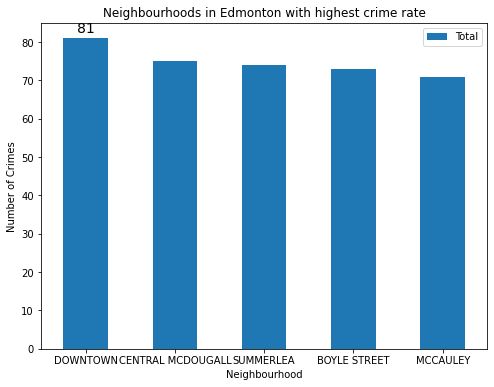

In [256]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]
per_neigh.set_index('Neighbourhood',inplace = True)
ax = per_neigh.plot(kind='bar', figsize=(8,6), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Edmonton with highest crime rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14,
               )
    plt.show()

In [257]:
crime_neigh_low = edm_crime_neigh.tail(5)
crime_neigh_low

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
151,THE ORCHARDS AT ELLERSLIE,0,0,0,0,0,1,0,0,1
48,EBBERS,0,0,0,0,0,1,0,0,1
49,EDGEMONT,0,0,0,0,0,1,0,0,1
67,HAYS RIDGE AREA,0,1,0,0,0,0,0,0,1
121,RAPPERSWILL,0,0,0,0,0,0,1,0,1


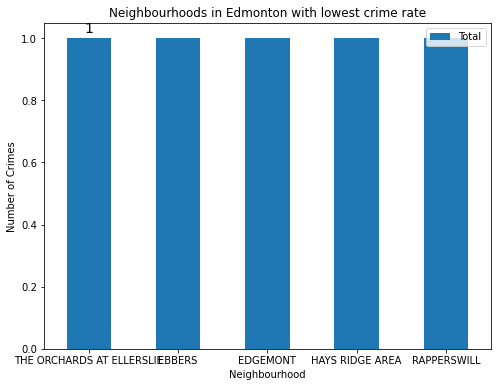

In [258]:
per_neigh = crime_neigh_low[['Neighbourhood','Total']]
per_neigh.set_index('Neighbourhood',inplace = True)
ax = per_neigh.plot(kind='bar', figsize=(8, 6), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Edmonton with lowest crime rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
               (p.get_x()+p.get_width()/2., p.get_height()),
               ha='center',
               va='center',
               xytext=(0, 10),
               textcoords='offset points',
               fontsize = 14,
               )
    plt.show()

**Due to low crime rate Northeast sector was chosen for new health center in Edmonton.**

In [259]:
edm_crime_cat.reset_index(inplace = True)
edm_crime_cat.columns = edm_crime_cat.columns.map(''.join)
edm_crime_cat.rename(columns={'YearAll':'Total',
                             'YearAssault':'Assault',
                              'YearBreak and Enter':'Break And Enter',
                              'YearHomicide':'Homicide',
                              'YearRobbery':'Robbery',
                              'YearSexual Assaults':'Sexual Assaults',
                              'YearTheft From Vehicle':'Theft From Vehicle',
                              'YearTheft Of Vehicle':'Theft Of Vehicle',
                              'YearTheft Over $5000':'Theft Over $5000'}, inplace=True)

edm_crime_cat

C:\Users\STAS\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,Borough,Assault,Break And Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total
0,0,Central Core,118,127,7,94,55,139,123,27,690
1,1,North Sector,130,165,1,39,20,219,163,19,756
2,2,Northeast Sector,141,124,0,50,32,165,142,8,662
3,3,Southeast Sector,216,235,2,80,51,271,202,16,1073


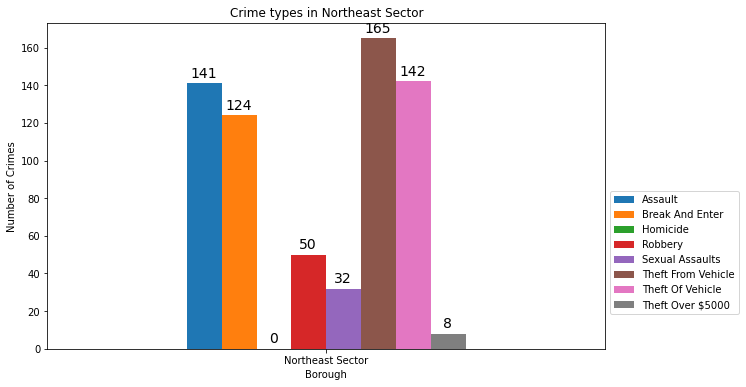

In [260]:
edm_ns_df = edm_crime_cat[edm_crime_cat['Borough'] == 'Northeast Sector']

edm_ns_df = edm_ns_df.sort_values(['Total'], ascending = True, axis = 0)

edm_ns = edm_ns_df[['Borough','Assault','Break And Enter','Homicide','Robbery', 
                    'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 
                    'Theft Over $5000']]

edm_ns.set_index('Borough', inplace = True)

ax = edm_ns.plot(kind='bar', figsize=(10,6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Crime types in Northeast Sector')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2),
               (p.get_x()+p.get_width()/3., p.get_height()),
                ha='center',
                va='center',
                xytext=(5, 10),
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

In [267]:
from opencage.geocoder import OpenCageGeocode
key = 'e9fe8e5f425540b4a1d27cfa70dcab00'
geocoder = OpenCageGeocode(key)
query = 'Northeast Sector, Edmonton, Canada'
results = geocoder.geocode(query)
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Northeast Sector is {} and {}.'.format(lat, lng))

The Latitude and Longitude of Northeast Sector is 53.55014 and -113.46871.


In [286]:
edm_ns_neigh = edm_boroughs_crime

edm_ns_neigh = edm_ns_neigh[edm_ns_neigh['Borough'] == 'Northeast Sector']
edm_ns_neigh.reset_index(inplace=True, drop=True)
print('Number of Neighbourhoods in Northeast Sector', len(edm_ns_neigh['Neighbourhood'].unique()))
edm_ns_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in Northeast Sector 20


array(['BANNERMAN', 'BELMONT', 'BRINTNELL', 'CANON RIDGE', 'CASSELMAN',
       'EBBERS', 'EVERGREEN', 'FRASER', 'GORMAN', 'HAIRSINE',
       'HOLLICK-KENYON', 'HOMESTEADER', 'KERNOHAN', 'KIRKNESS',
       'MATT BERRY', 'MCCONACHIE AREA', 'MCLEOD', 'MILLER', 'OVERLANDERS',
       'SIFTON PARK'], dtype=object)

In [289]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = edm_ns_neigh['Neighbourhood'].unique()

key = 'e9fe8e5f425540b4a1d27cfa70dcab00'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Edmonton, AB, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('Northeast Sector')
print(Latitude, Longitude)


[53.6037195, 53.5931655, 53.6213637, 53.5788467, 53.6113355, 53.6111574, 53.6323394, 53.6114078, 53.6216001, 53.6037958, 53.6225269, 53.5870347, 53.5941459, 53.6111521, 53.6224127, 53.6350385, 53.6105448, 53.6108566, 53.5813944, 53.5945194] [-113.379078, -113.3946993, -113.4073267, -113.378862, -113.424048, -113.401074, -113.350682, -113.370126, -113.385106, -113.390385, -113.422436, -113.406674, -113.381152, -113.389232, -113.436784, -113.430132, -113.436808, -113.412711, -113.388782, -113.40875]


In [290]:
ns_neig_dict = {'Neighbourhood':Neighbourhood, 'Borough':Borough, 'Latitude':Latitude, 'Longitude':Longitude}
ns_neig_geo = pd.DataFrame(data=ns_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)
ns_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,BANNERMAN,Northeast Sector,54,-113
1,BELMONT,Northeast Sector,54,-113
2,BRINTNELL,Northeast Sector,54,-113
3,CANON RIDGE,Northeast Sector,54,-113
4,CASSELMAN,Northeast Sector,54,-113
5,EBBERS,Northeast Sector,54,-113
6,EVERGREEN,Northeast Sector,54,-113
7,FRASER,Northeast Sector,54,-113
8,GORMAN,Northeast Sector,54,-113
9,HAIRSINE,Northeast Sector,54,-113


In [295]:
address = 'Edmonton, AB, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']
print('The geographical coordinates of Edmonton, Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Edmonton, Canada are 53.535411, -113.507996.


In [297]:
edm_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(ns_neig_geo['Latitude'], ns_neig_geo['Longitude'], ns_neig_geo['Borough'], ns_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(edm_map)  
    
edm_map

**Setting up Foursquare Credentials**

In [303]:
CLIENT_ID = 'P4QMTOY0PPXHHWNNPEAHDI2UYR3XVB20XFQ5MINSXL05KH2E'
CLIENT_SECRET = '3VLV3HX0O1P0KGPCZYAP4VIWCFTMRTTKWRTK5ZCO2KATWSGN'
VERSION = '20210125'
LIMIT = 100

In [310]:
LIMIT = 100 
radius = 500 

url = ‘https://api.foursquare.com/v2/venues/explore?&client_id={P4QMTOY0PPXHHWNNPEAHDI2UYR3XVB20XFQ5MINSXL05KH2E}&client_secret={3VLV3HX0O1P0KGPCZYAP4VIWCFTMRTTKWRTK5ZCO2KATWSGN}&v={20210125}&ll={53.55014},{-113.46871}&radius={500}&limit={100}'.format()

results = requests.get(url).json()["response"]['groups'][0]['items']
        
venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighbourhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Category']
    
return(nearby_venues)

SyntaxError: invalid character in identifier (<ipython-input-310-90ca17f0dfdb>, line 4)